In [1]:
import pandas as pd
import math
import numpy as np
from sklearn import preprocessing

In [39]:
df = pd.read_csv('./data.csv')
df.head()

,Unnamed: 0,username,content,date,country,replyCount,retweetCount,likeCount,url,sentiment
0,0,Telecvrso2000,@DailyMail Hunter Biden,2020-11-18 17:30:22+00:00,Brazil,0,0,0,https://twitter.com/Telecvrso2000/status/13291...,Pro Trump
1,1,PaulJGale,@realDonaldTrump Your gradually getting it Tru...,2020-11-24 01:32:10+00:00,France,0,0,0,https://twitter.com/PaulJGale/status/133104792...,Pro Biden
2,2,mattoman71,"$1.95 million, billion seems like a lot of mon...",2020-11-14 00:51:58+00:00,Australia,0,0,1,https://twitter.com/mattoman71/status/13274139...,Pro Biden
3,3,tglocer,@duty2warn How about returning the name of Joh...,2020-12-22 02:01:54+00:00,Canada,0,0,1,https://twitter.com/tglocer/status/13412022714...,Pro Trump
4,4,Bduffyphoto,Fairly smart of @CNN to declare Michigan for B...,2020-11-04 21:25:35+00:00,France,0,0,0,https://twitter.com/Bduffyphoto/status/1324100...,Pro Biden


In [40]:
def logFinder(df):
    if df == 0:
        x = 1
    else:
        x = 1+np.log(2*df)
    return x

In [41]:
rep = df['replyCount'].apply(lambda x: logFinder(x))
ret = df['retweetCount'].apply(lambda x: logFinder(x))
lik = df['likeCount'].apply(lambda x: logFinder(x))

df['weightedSentiment'] = 1*rep*ret*lik

In [42]:
a, b = 0, 1
x, y = df.weightedSentiment.min(), df.weightedSentiment.max()
df['weightedSentimentNorm'] = (df.weightedSentiment - x) / (y - x) * (b - a) + a

In [43]:
df

,Unnamed: 0,username,content,date,country,replyCount,retweetCount,likeCount,url,sentiment,weightedSentiment,weightedSentimentNorm
0,0,Telecvrso2000,@DailyMail Hunter Biden,2020-11-18 17:30:22+00:00,Brazil,0,0,0,https://twitter.com/Telecvrso2000/status/13291...,Pro Trump,1.000000,0.000000
1,1,PaulJGale,@realDonaldTrump Your gradually getting it Tru...,2020-11-24 01:32:10+00:00,France,0,0,0,https://twitter.com/PaulJGale/status/133104792...,Pro Biden,1.000000,0.000000
2,2,mattoman71,"$1.95 million, billion seems like a lot of mon...",2020-11-14 00:51:58+00:00,Australia,0,0,1,https://twitter.com/mattoman71/status/13274139...,Pro Biden,1.693147,0.000965
3,3,tglocer,@duty2warn How about returning the name of Joh...,2020-12-22 02:01:54+00:00,Canada,0,0,1,https://twitter.com/tglocer/status/13412022714...,Pro Trump,1.693147,0.000965
4,4,Bduffyphoto,Fairly smart of @CNN to declare Michigan for B...,2020-11-04 21:25:35+00:00,France,0,0,0,https://twitter.com/Bduffyphoto/status/1324100...,Pro Biden,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
28408,28408,wilsonfkp,"Strangely, nobody is talking about Biden's emails",2020-10-21 01:03:55+00:00,South Korea,0,1,0,https://twitter.com/wilsonfkp/status/131871963...,Pro Trump,1.693147,0.000965
28409,28409,1st_Keyofficial,Are they going to crucify Donald Trump after t...,2020-11-03 11:14:07+00:00,Nigeria,0,0,0,https://twitter.com/1st_Keyofficial/status/132...,Pro Trump,1.000000,0.000000
28410,28410,AntonyHammond,American resident says that #Trump is not a po...,2020-11-03 21:20:53+00:00,France,0,0,0,https://twitter.com/AntonyHammond/status/13237...,Pro Biden,1.000000,0.000000
28411,28411,Moncton_Cameron,.@realDonaldTrump My guess is they’re still la...,2020-12-04 18:41:22+00:00,Canada,0,0,0,https://twitter.com/Moncton_Cameron/status/133...,Pro Biden,1.000000,0.000000


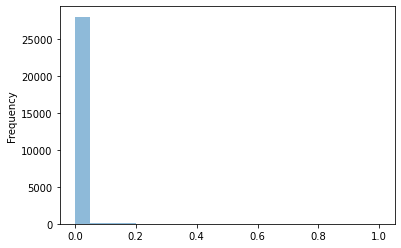

In [44]:
ax = df['weightedSentimentNorm'].plot.hist(bins=20, alpha=0.5)

In [45]:
data = df.groupby(['country', 'sentiment'])['weightedSentimentNorm'].agg(['count', 'sum'])

In [47]:
data = data.reset_index()
data.head()

,index,country,sentiment,count,sum
0,0,Afghanistan,Pro Biden,1074,4.054847
1,1,Afghanistan,Pro Trump,208,0.580166
2,2,Australia,Pro Biden,783,4.310281
3,3,Australia,Pro Trump,591,1.956936
4,4,Brazil,Pro Biden,1351,4.975530


In [55]:
def normalize(df, country):
    data = df[df['country'] == country]
    data.reset_index(drop=True, inplace=True)
    actual_sentiment = data['sentiment'][0] if data['sum'][0] > data['sum'][1] else data['sentiment'][1]
    normalized_score = (max(data['sum']) - min(data['sum'])) / min(data['sum'])
    overall_normalization = (normalized_score - min(df['sum'])) / (max(df['sum']) - min(df['sum']))
    return country, actual_sentiment, overall_normalization

countries = data['country'].unique()
array = []
for country in countries:
    array.append(normalize(data, country))



[('Afghanistan', 'Pro Biden', 0.4372946687551871),
 ('Australia', 'Pro Biden', 0.08560489527892692),
 ('Brazil', 'Pro Biden', 0.0802677971110204),
 ('Canada', 'Pro Biden', 0.10357124379247178),
 ('China', 'Pro Biden', 0.17998559787832963),
 ('France', 'Pro Biden', 0.14509740950673602),
 ('Germany', 'Pro Biden', 0.008631152143299861),
 ('India', 'Pro Biden', 0.06812674002103496),
 ('Indonesia', 'Pro Biden', 0.5063741320610051),
 ('Iran', 'Pro Biden', 0.8252663296404833),
 ('Israel', 'Pro Biden', 0.3355408446077264),
 ('Japan', 'Pro Biden', 0.044254092344434656),
 ('Kenya', 'Pro Biden', 0.08393494616704976),
 ('Mexico', 'Pro Trump', 0.13683202190886148),
 ('Nigeria', 'Pro Biden', 0.03144950720602387),
 ('Philippines', 'Pro Biden', 0.004586458073434572),
 ('Russia', 'Pro Biden', 0.09977529078359959),
 ('Saudi Arabia', 'Pro Biden', 0.024130173398595297),
 ('Singapore', 'Pro Biden', 0.22317670703358183),
 ('South Korea', 'Pro Trump', 0.07576829877531464),
 ('Taiwan', 'Pro Biden', 0.35540190

In [64]:
dataframe = pd.DataFrame(array)
dataframe.columns = ["country", "sentiment", "score"]
dataframe.to_csv('country_scores.csv', index=False)